<a href="https://colab.research.google.com/github/simulate111/machine-learning-aalto/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
pip install xgboost
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d lainguyn123/student-performance-factors
!unzip student-performance-factors.zip

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
100% 93.9k/93.9k [00:00<00:00, 585kB/s]
100% 93.9k/93.9k [00:00<00:00, 584kB/s]


In [6]:
import pandas as pd

data = pd.read_csv('StudentPerformanceFactors.csv')  # Replace with the actual filename
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [8]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error (MSE): 80.97
Mean Absolute Error (MAE): 9.00
Huber Loss: 8.50
R-squared: nan


<ipython-input-16-8607ea84ada0>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Teacher_Quality', data=df, palette='Set2')


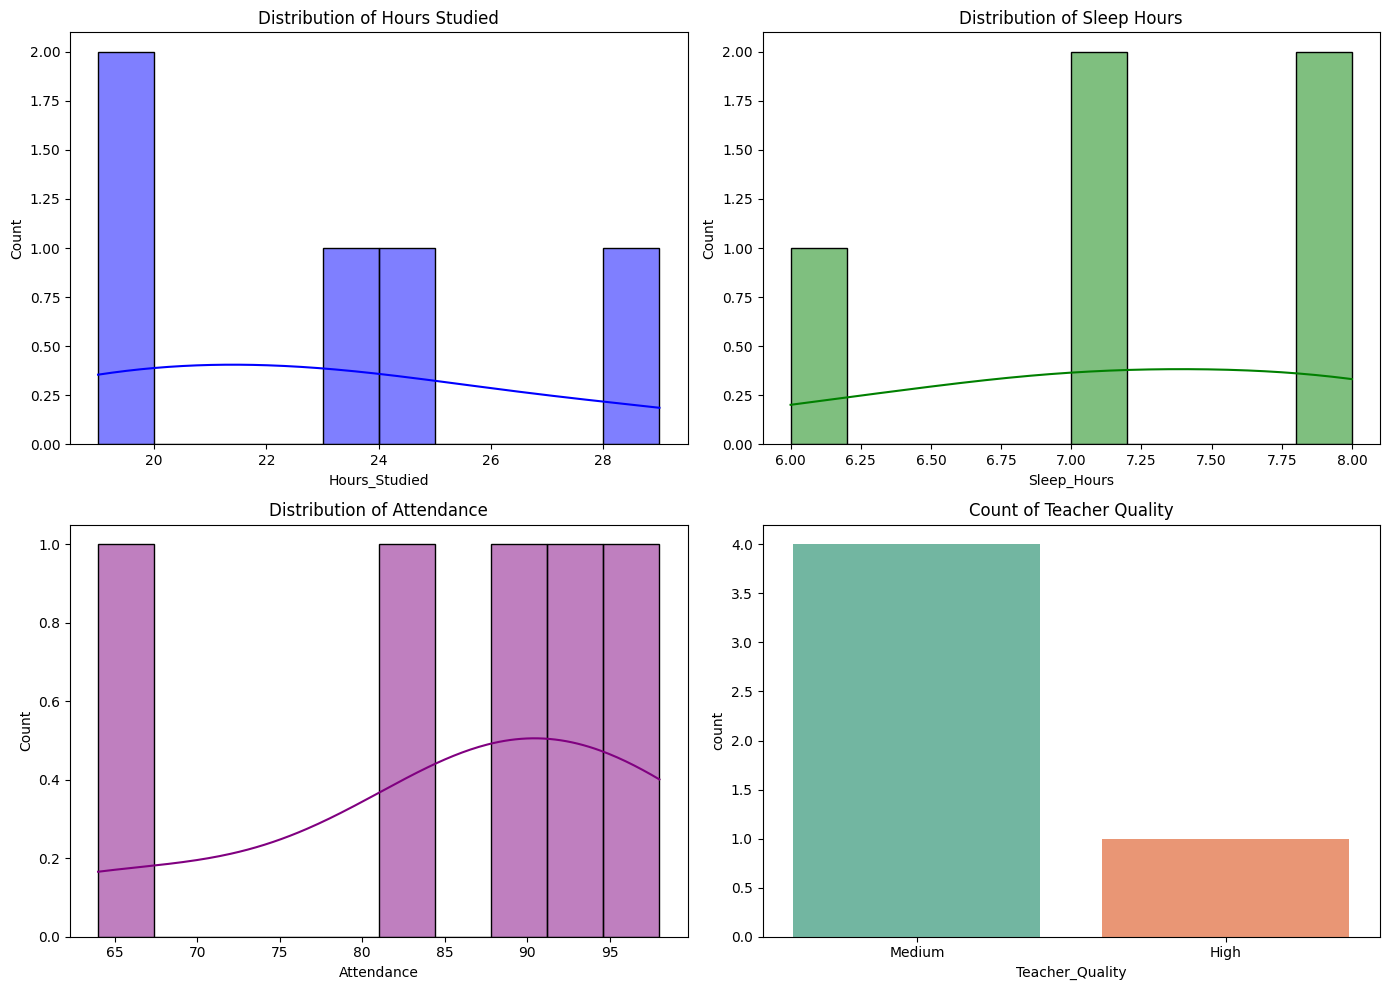

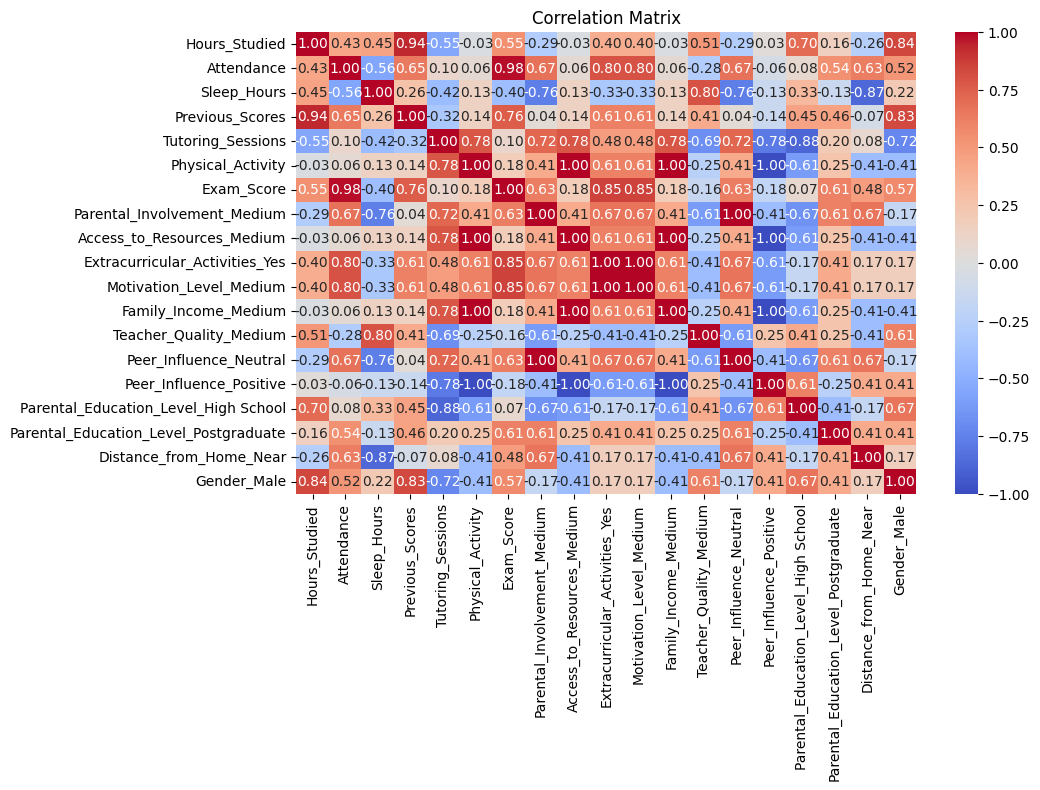

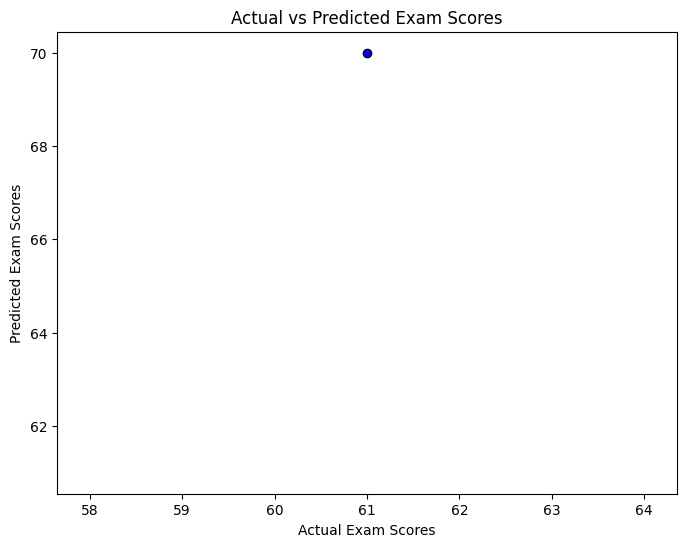

<ipython-input-16-8607ea84ada0>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.sort_values(by='Importance', ascending=False), palette='viridis')


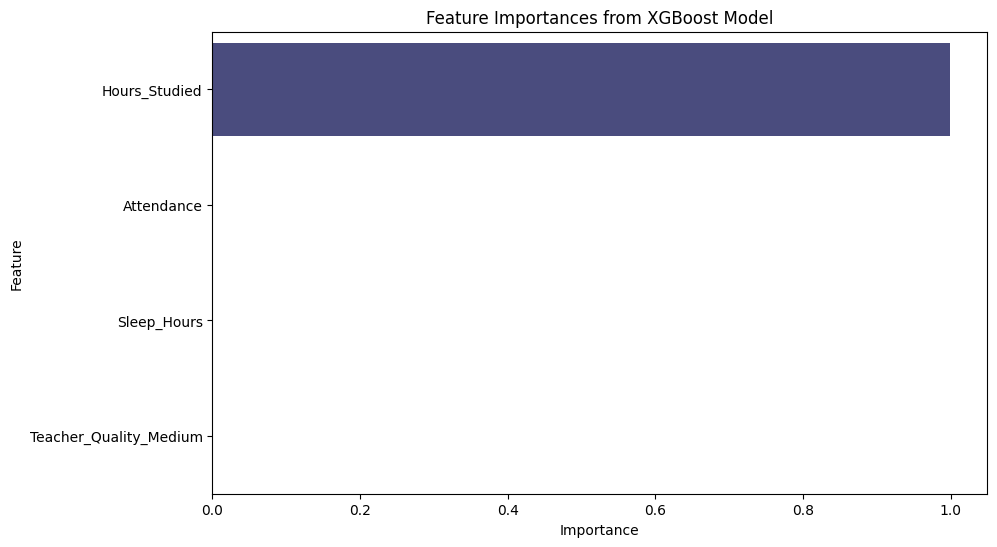

In [16]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Step 2: Load the data
# Example: df = pd.read_csv('your_dataset.csv')

# Step 3: Prepare the data
features = df[['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Teacher_Quality']]
target = df['Exam_Score']

# Encode categorical variables
features = pd.get_dummies(features, drop_first=True)  # One-hot encoding for categorical variables

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 5: Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = xgb_model.predict(X_test)

# Step 7: Evaluate the model using MSE, MAE, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared and handle the case with fewer than two samples
try:
    r2 = r2_score(y_test, y_pred)
except ValueError:
    r2 = float('nan')

# Step 8: Define the Huber Loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss).mean()

# Calculate Huber Loss
huber = huber_loss(y_test, y_pred, delta=1.0)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Huber Loss: {huber:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 9: Visualize Basic Data Distributions
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Hours_Studied'], kde=True, bins=10, color='blue')
plt.title('Distribution of Hours Studied')

plt.subplot(2, 2, 2)
sns.histplot(df['Sleep_Hours'], kde=True, bins=10, color='green')
plt.title('Distribution of Sleep Hours')

plt.subplot(2, 2, 3)
sns.histplot(df['Attendance'], kde=True, bins=10, color='purple')
plt.title('Distribution of Attendance')

plt.subplot(2, 2, 4)
sns.countplot(x='Teacher_Quality', data=df, palette='Set2')
plt.title('Count of Teacher Quality')

plt.tight_layout()
plt.show()

# Step 10: Convert Categorical Variables to Numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 11: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 12: Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.show()

# Step 13: Feature Importance
importances = xgb_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.sort_values(by='Importance', ascending=False), palette='viridis')
plt.title('Feature Importances from XGBoost Model')
plt.show()
